# rossmann-toolbox tutorial
---
In the case of problems do not hesitate to [contact us!](https://lbs.cent.uw.edu.pl)


In [1]:
import sys
sys.path.append('..')

from rossmann_toolbox import RossmannToolbox
import matplotlib.pylab as plt

# Structure-based predictions require FoldX, an external tool that can be obtained at 
# http://foldxsuite.crg.eu/academic-license-info
# Note that the FoldX academic license expires periodically and has to be renewed.
PATH_FOLDX = '/home/users/sdunin/apps/foldx5/foldx'

# The bab core regions can be either provided as an input or detected with the rossmann-toolbox. 
# The predictions can be made either with a deep learning tool included in the package or with 
# the HHpred tool. In the latter case, the HHpred path has to be provided.
PATH_HHPRED = '/opt/apps/hh-suite/bin/hhsearch'

PATH_DSSP='/opt/apps/dssp-3.1.4/mkdssp'

Using backend: pytorch


In [2]:
rtb = RossmannToolbox(use_gpu=True, foldx_loc = PATH_FOLDX, 
                                    hhsearch_loc = PATH_HHPRED,
                                    dssp_loc = PATH_DSSP)

## Sequence-based predictions

#### The b-a-b core sequence is provided by the user `mode='core'`

In [3]:
# Example obtained from Bae et al., 2010

data = {'seq_wt': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGR', # WT, binds NAD
        'seq_mut': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'} # D211S, I212R mutant, binds NADP

seq_preds, imps = rtb.predict(data, mode='core', importance=True)
seq_preds

{'seq_wt': {'FAD': 0.00053916854,
  'FAD_std': 0.0010577103,
  'NAD': 0.9992666,
  'NAD_std': 0.0014605422,
  'NADP': 3.2585238e-05,
  'NADP_std': 5.041259e-05,
  'SAM': 0.00018488245,
  'SAM_std': 0.00035966522},
 'seq_mut': {'FAD': 1.6376638e-05,
  'FAD_std': 2.7080328e-05,
  'NAD': 0.017441133,
  'NAD_std': 0.031513363,
  'NADP': 0.99435437,
  'NADP_std': 0.010009565,
  'SAM': 3.4941448e-05,
  'SAM_std': 4.8398204e-05}}

#### The per-residue importances `importance='True'`

<ErrorbarContainer object of 3 artists>

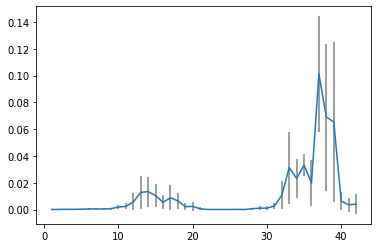

In [4]:
# Which residues made the greatest contribution in predicting the WT as NAD-binding?
seq_len = len(data['seq_wt'])
plt.errorbar(list(range(1, seq_len+1)),
             imps['seq_wt']['NAD'][0], yerr=imps['seq_wt']['NAD'][1], ecolor='grey')


#### The b-a-b core will be predicted in the full-length sequence `mode='seq'`

In [5]:
data = {'3m6i_A': 'MASSASKTNIGVFTNPQHDLWISEASPSLESVQKGEELKEGEVTVAVRSTGICGSDVHFWKHGCIGPMIVECDHVLGHESAGEVIAVHPSVKSIKVGDRVAIEPQVICNACEPCLTGRYNGCERVDFLSTPPVPGLLRRYVNHPAVWCHKIGNMSYENGAMLEPLSVALAGLQRAGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRLKFAKEICPEVVTHKVERLSAEESAKKIVESFGGIEPAVALECTGVESSIAAAIWAVKFGGKVFVIGVGKNEIQIPFMRASVREVDLQFQYRYCNTWPRAIRLVENGLVDLTRLVTHRFPLEDALKAFETASDPKTGAIKVQIQSLE'}

# Core region detection with in-built deep-learning model
preds = rtb.predict(data, mode='seq', core_detect_mode='dl', importance=False)
preds

{'3m6i_A': {'FAD': 0.00089554524,
  'FAD_std': 0.0017580233,
  'NAD': 0.998446,
  'NAD_std': 0.0030978944,
  'NADP': 0.00015508439,
  'NADP_std': 0.00028932205,
  'SAM': 0.00025443893,
  'SAM_std': 0.00049188413,
  'sequence': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRL'}}

In [6]:
# Core region detection with HHsearch tool of the HHpred package 
# Note that the two approaches may yield different results
preds = rtb.predict(data, mode='seq', core_detect_mode='hhsearch', importance=False)
preds

{'3m6i_A': {'FAD': 0.001070828,
  'FAD_std': 0.0016058232,
  'NAD': 0.99925435,
  'NAD_std': 0.0013703959,
  'NADP': 0.0001793908,
  'NADP_std': 0.00020505667,
  'SAM': 0.00024647798,
  'SAM_std': 0.00047857413,
  'sequence': 'VLICGAGPIGLITMLCAKAAGACPLVITDIDE'}}

## Structure-based predictions

In [7]:
# We don't want to see PDB parsing warnings
import warnings; warnings.filterwarnings("ignore")

#### The b-a-b core will be predicted in the input structure `mode='seq'`

In [8]:
# Here, the input structure and all intermediate files will be stored
# Please follow naming format XXXX_Y.pdb where XXXX is protein id and Y is a chain
path_to_structures = '/home/users/sdunin/calc/Rossmann/toolbox-test/data/seq_mode'

# Define chains that will be evaluated. If the structure is not present in the directory it will be downloaded
chains_to_use = ['3m6i_A']

# The WT structure was predicted (as in the case of sequence-based mode) to bind NAD
struct_preds_wt = rtb.predict_structure(path_to_structures, chains_to_use, mode='seq', core_detect_mode='dl')
struct_preds_wt

[{'NAD': 0.99977881,
  'NADP': 0.0018195,
  'SAM': 0.00341983,
  'FAD': 3.62e-05,
  'seq': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRL',
  'NAD_std': 0.0003879,
  'NADP_std': 0.00213571,
  'SAM_std': 0.00411747,
  'FAD_std': 3.95e-05}]

#### The b-a-b core is provided by the user `mode='core'`

In [9]:
path_to_structures = '/home/users/sdunin/calc/Rossmann/toolbox-test/data/core_mode'

# The 3m6i_A.pdb file contains a model obtained with Modeller in which the two mutations D211S, I212R
# were introduced. Not that this is a model of the whole structure, not just the core region. 
# The full structure has to be used, as the structural features are contextual (e.g. burial of a residue
# can be correctly assessed only in the context of the whole structure)
chains_to_use = ['3m6i_A']
core_list = ['AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR']

In [10]:
# The mutated structure was predicted (as in the case of sequence-based mode) to bind NADP
struct_preds_mut = rtb.predict_structure(path_to_structures, chains_to_use, mode='core', 
                              core_list=core_list)
struct_preds_mut

[{'NAD': 0.07392213,
  'NADP': 0.99374682,
  'SAM': 0.00392577,
  'FAD': 0.00022765,
  'seq': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR',
  'NAD_std': 0.12206662,
  'NADP_std': 0.00773784,
  'SAM_std': 0.00406186,
  'FAD_std': 0.00028909}]

The structure-based method also returns the per-residue importances `importance='True'`  \
Upon executing `predict_structure` the structural data will be stored in `rtb.feats3d`

### merging predictions

In [11]:
for cof, i in rtb.dl3d.LABEL_DICT.items():
    score_wt = (seq_preds['seq_wt'][cof] + struct_preds_wt[0][cof])/2
    score_mut = (seq_preds['seq_mut'][cof] + struct_preds_mut[0][cof])/2
    print(f'{cof:>4} wt: {score_wt:.3f}', f' mut: {score_mut:.3f}')

 NAD wt: 1.000  mut: 0.046
NADP wt: 0.001  mut: 0.994
 SAM wt: 0.002  mut: 0.002
 FAD wt: 0.000  mut: 0.000


In [12]:
# User-defined core region
core_seq = 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'
# `imps` is a list of dictionaries same as for `predict` method
preds, imps = rtb.predict_structure(path_to_structures, chains_to_use, mode='core', importance=True, 
                              core_list=[core_seq])

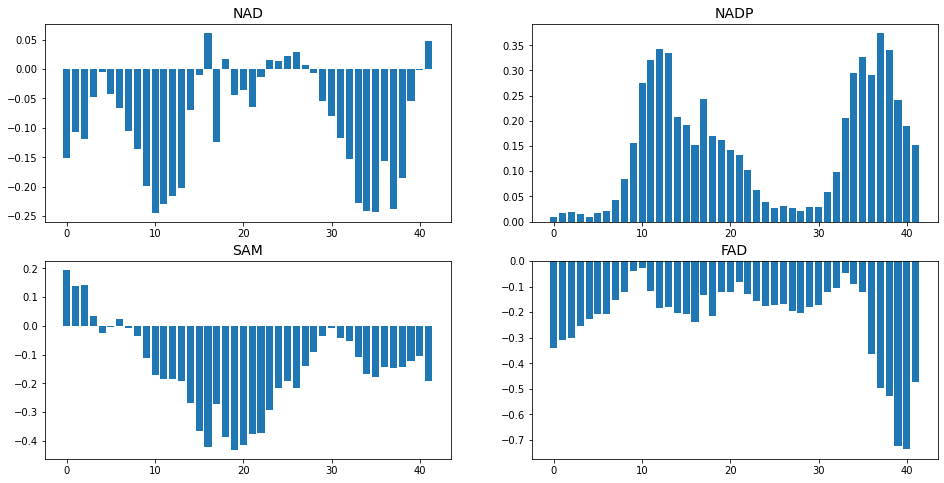

In [13]:
single_emb = imps[0]

fig, ax = plt.subplots(2,2,figsize=(16, 8))
ax = ax.ravel()
for cof, i in rtb.dl3d.LABEL_DICT.items():
    ax[i].set_title(cof, fontsize=14)
    ax[i].bar(height=single_emb[cof].ravel(), x=list(range(single_emb[cof].size)))

## mapping node importance on graph via `networkx`

In [14]:
import networkx as nx
import seaborn as sns
import numpy as np

from rossmann_toolbox.utils.struct_loader import ShowNxGraph

sng = ShowNxGraph()

In [15]:
#example scaling function
def scale_embeddings(emb): 
    '''
    sign conserved embedding scaling
    '''
    emb_abs_max = np.quantile(np.abs(emb), [0.95])
    sigm = 1/(1 + np.exp(-emb.sum(0)))
    x = 0.5 + 0.5*(np.clip(emb/emb_abs_max, a_min=-1, a_max=1))
    x *= 255
    return x.astype(np.int64)

def color_nodes(arr, cmap, cof):
    '''
    color values by given color map
    '''
    colored_nodes = dict()
    for i, val in enumerate(arr[:, cof]):
        colored_nodes[i] = cmap(val)
    return colored_nodes

In [16]:
node_size = 350
#node labels are options
node_labels = {i : aa for i, aa in enumerate(core_seq)}

# custom color map with diverging colors: blue (negative) - white (neutral) - green (positive)
custom_cmap = sns.diverging_palette(240, 125, s=80, l=55, n=5, as_cmap=True)

# convert embeddings to arr (num_nodes, num_cofactors)
embeddings = np.concatenate(tuple(single_emb.values()), axis=1)
#cast embeddings integers in range 0 - 255
scaled_embeddings = scale_embeddings(embeddings)

NAD  = color_nodes(scaled_embeddings, custom_cmap, 0)
NADP = color_nodes(scaled_embeddings, custom_cmap, 1)
SAM  = color_nodes(scaled_embeddings, custom_cmap, 2)
FAD  = color_nodes(scaled_embeddings, custom_cmap, 3)

In [17]:
idx = rtb.feats3d['dataframe'].iloc[0].name
g = nx.Graph(rtb.feats3d['contact_maps'][idx][0] < rtb.dl3d.CM_THRESHOLD)
pos = nx.kamada_kawai_layout(g)

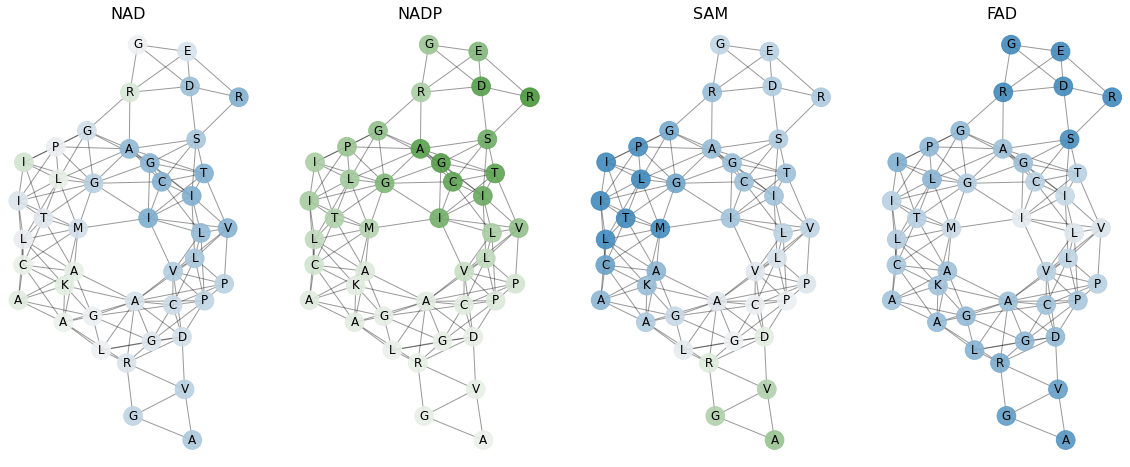

In [18]:
fig, ax = plt.subplots(1,4,figsize=(20,8))
ax = ax.ravel()
_ = sng.draw(g=g, residue_scores=NAD,  node_labels=core_seq, node_positions=pos, node_size=node_size, ax=ax[0]); ax[0].set_title('NAD', fontsize=16);
_ = sng.draw(g=g, residue_scores=NADP, node_labels=core_seq, node_positions=pos, node_size=node_size, ax=ax[1]); ax[1].set_title('NADP', fontsize=16);
_ = sng.draw(g=g, residue_scores=SAM,  node_labels=core_seq, node_positions=pos, node_size=node_size, ax=ax[2]); ax[2].set_title('SAM', fontsize=16);
_ = sng.draw(g=g, residue_scores=FAD,  node_labels=core_seq, node_positions=pos, node_size=node_size, ax=ax[3]); ax[3].set_title('FAD', fontsize=16);
for i in range(4):
    ax[i].set_axis_off()
fig.patch.set_facecolor('white')

---